# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [2]:
plt.rc("font", family="serif")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("legend", fontsize="small")
plt.rc("axes", labelsize="small")

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [23]:
!ls $SCRATCH/elias_expe/2_agents/cooperative/modified_reward/3_landmarks



50align      naming_game_30msg_t30_a10	naming_game_t30_a10
centralized  naming_game_9msg_t30_a10
independent  naming_game_t15_a10


ls: cannot access '/gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/centralized/all/modified_reward/6_landmarks/naming_game': No such file or directory


In [10]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10"]

In [24]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10"]

In [25]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
                        #if(ctr>5):
                            #print(dump.keys())
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["episode_reward_mean"])

                        metrics = dump.get("evaluation")
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            r.append(metrics["episode_reward_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-09-23_00-51-45mg47tdp3
2022-09-23_00-51-45yyne3mdd
2022-09-23_00-51-02xx5mt8q5
2022-09-23_00-51-456kidioiu
2022-09-23_00-51-45wg3nss14
2022-09-23_01-19-23dt2qqg_k
2022-09-23_01-18-59h32479po
2022-09-23_01-19-23p2ede0dc
2022-09-23_01-19-23koqpbuv1
2022-09-23_01-19-237fangql2
2022-10-18_15-24-518jizlj8s
2022-10-18_15-24-51q86c5x2j
2022-10-18_15-24-47hfgb30vh
2022-10-18_15-24-51t1gprz6m
2022-10-18_15-24-51zdvhuspn
2022-10-18_14-46-06aa8sbiav
2022-10-18_14-50-446v826kky
2022-10-18_14-50-18tg_3by1p
2022-10-18_14-46-06ccy0q4se
2022-10-18_14-50-44grz3l_hx


Training plots

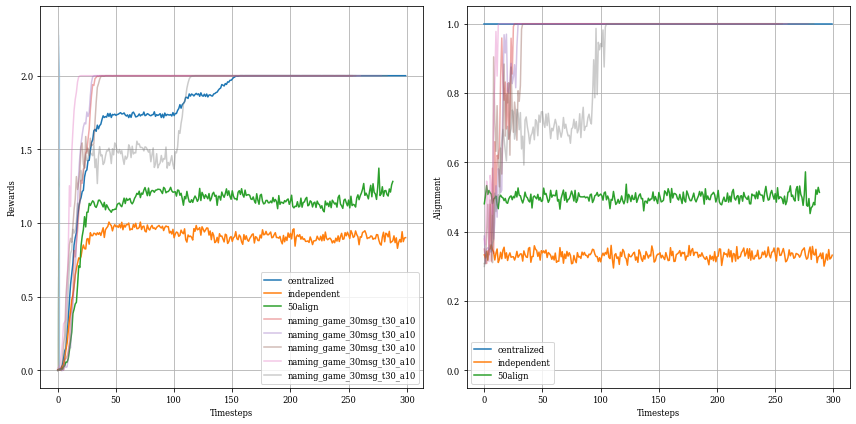

In [26]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)


        
for label, result in results.items():
    if( label!="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
            result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["alignment"].mean(axis=1) - result["alignment"].std(axis=1),
            result["alignment"].mean(axis=1) + result["alignment"].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1
for label, result in results.items():
    if( label=="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice],alpha=0.4,label=label)
   
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice],alpha=0.4)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

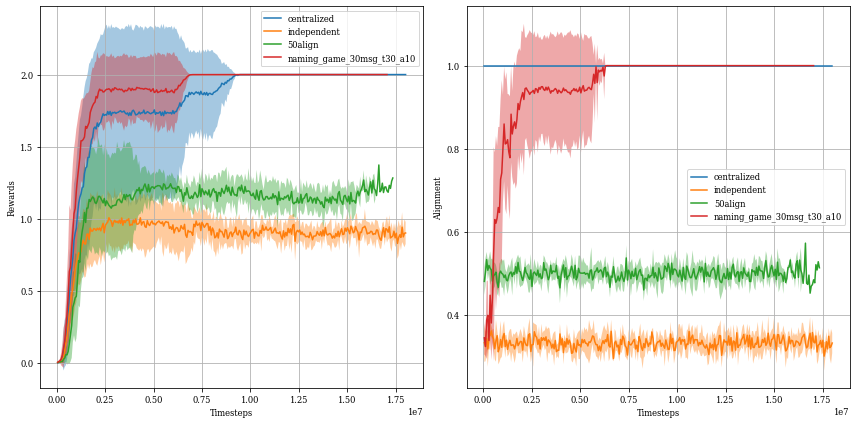

In [27]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Eval plots

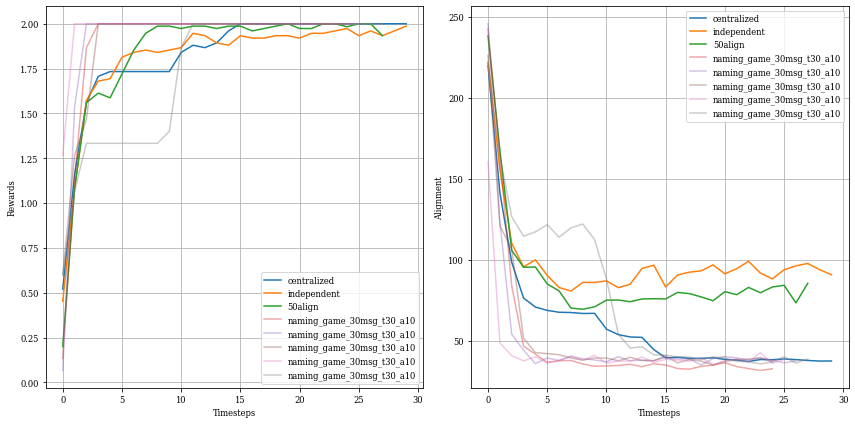

In [28]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")

slice=100
i = 1
n_exp = len(results)

        
for label, result in results.items():
    if(label!="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice].mean(axis=1), label=label)
     
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Eval Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice].mean(axis=1), label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Episode len")
        i += 1
for label, result in results.items():
    if(label=="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

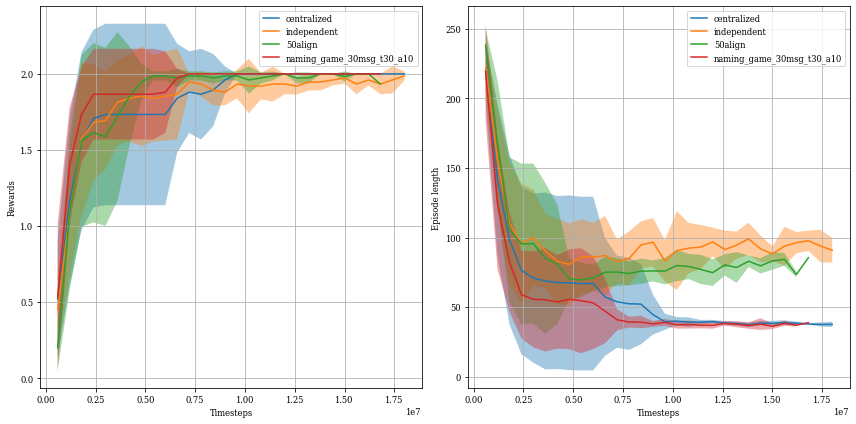

In [29]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)